### EDA - Exploratory Data Analysis 

here we are performing all the operations on the titanic dataset 

In [97]:
print('Today we are learning EDA analysis in data sciecne')

Today we are learning EDA analysis in data sciecne


In [98]:
## Importing alll the library that is need for this  practice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
## Importing data in Datframe
data=pd.read_csv('titanic_dataset\\train.csv')
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Finding the missing data

In [100]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

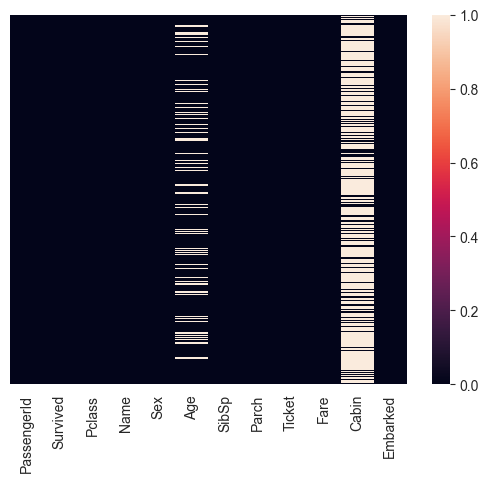

In [101]:
sns.heatmap(data.isnull(),yticklabels=False)

<AxesSubplot: xlabel='Survived', ylabel='count'>

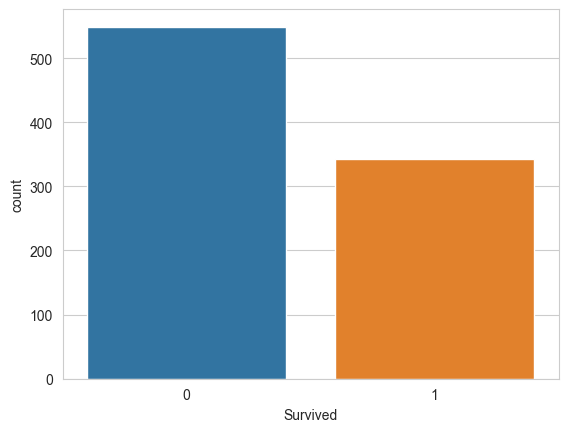

In [102]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

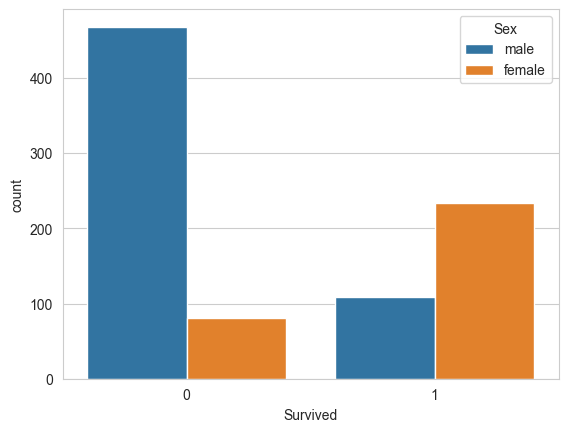

In [103]:
sns.countplot(x='Survived',hue='Sex',data=data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

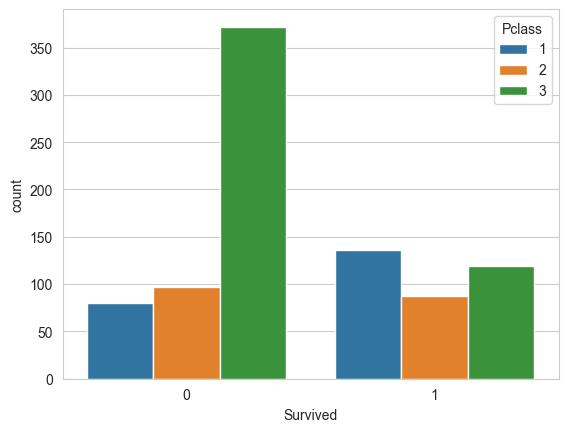

In [104]:
sns.countplot(x='Survived',hue='Pclass',data=data)

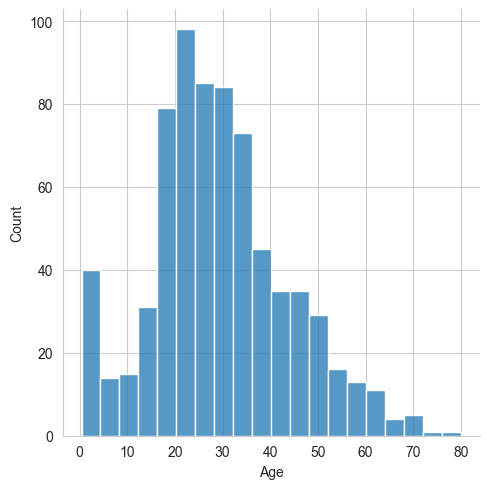

In [105]:
sns.displot(data['Age'].dropna(),kde=False)

<AxesSubplot: >

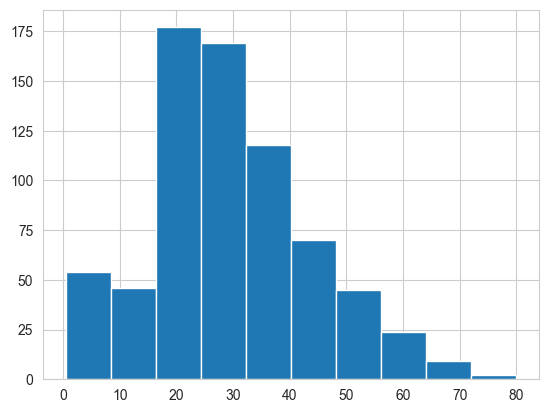

In [106]:
data['Age'].hist()

<AxesSubplot: xlabel='SibSp', ylabel='count'>

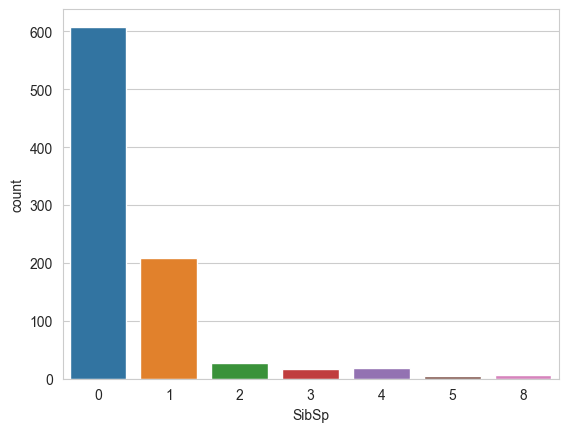

In [107]:
sns.countplot(x='SibSp',data=data)

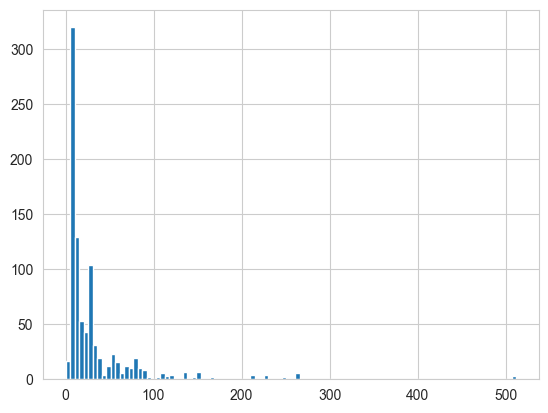

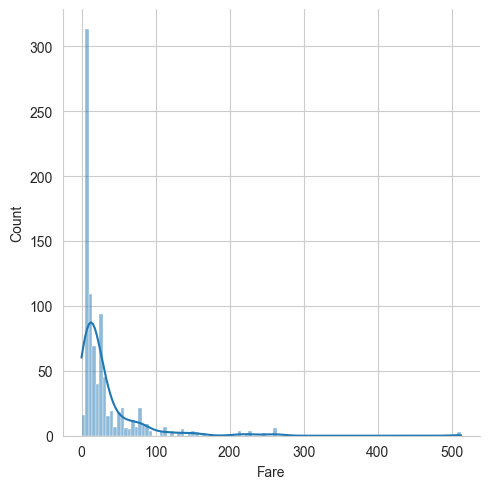

In [108]:
data['Fare'].hist(bins=100)
sns.displot(data['Fare'],kde=True)

## Data Cleaning 


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

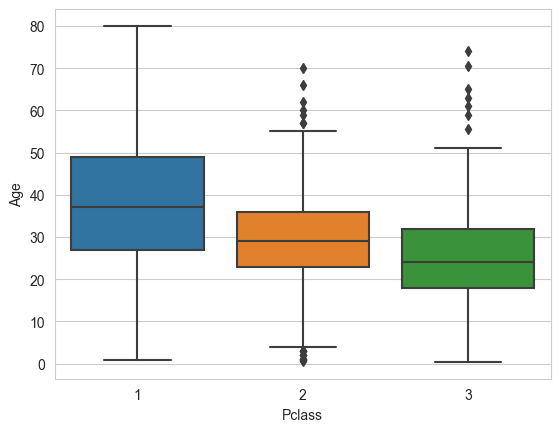

In [109]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [110]:
### For data cleaning of age column we are writing a function
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29

        else:
            return 24
    else:
        return Age 

In [111]:
data['Age']=data[['Age','Pclass']].apply(inpute_age,axis=1)

<AxesSubplot: >

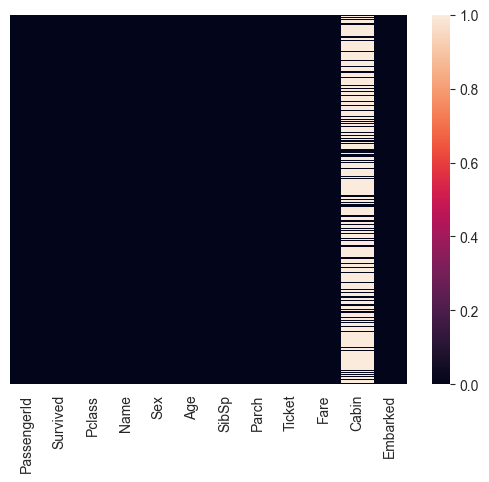

In [112]:
sns.heatmap(data.isnull(),yticklabels=False)

In [113]:
## Droping the cabn column
data.drop('Cabin',axis=1,inplace=True)

In [114]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [115]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [119]:
##3     cOnverting categorical feature into numerica form 
pd.get_dummies(data['Embarked'],drop_first=True)


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [120]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [121]:
###     Dropping unwanted columns from the dataset
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [122]:

data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [123]:
## Now we are adding the numeriacl column 
data=pd.concat([data,embark,sex],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


### Deviding the whole variable into the dependent and iNdependent manner
1. Train 
2. test Data

In [124]:
data.drop('Survived',axis=1).head()  ### Train Data 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,3,22.0,1,0,7.2500,0,1,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,1,0
4,5,3,35.0,0,0,8.0500,0,1,1


In [125]:
data['Survived'].head()  # Test data

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_tRain,Y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.30,random_state=101)

## Training and Predicting 

In [127]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_Train,Y_tRain)

LogisticRegression(max_iter=5000)

In [140]:
prediction=log_model.predict(X_Test)

In [141]:
from sklearn.metrics import confusion_matrix

In [143]:
accuracy=confusion_matrix(Y_test,prediction)

In [144]:
accuracy

array([[148,  15],
       [ 32,  72]], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy=accuracy_score(Y_test,prediction)
print('Our Model accuracy is - ', accuracy)

Our Model accuracy is -  0.8239700374531835


In [148]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)